In [131]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns

In [132]:
retail=pd.read_csv('sales_data.xlsx - Online Retail.csv')

In [133]:
retail.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


We can see that the datafile has information given for each single transaction. Take a look at the InvoiceNo and the CustomerID of the first entries. Here we can see that one customer with ID 17850 of the United Kingdom made a single order that has the InvoideNo 536365. The customer ordered several products with different stockcodes, descriptions, unit prices and quantities. In addition we can see that the InvoiceDate was the same for these products.

In [134]:
retail.shape

(541909, 8)

The dataset contains 541909 records and 8 attributes

In [135]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
transaction_id           541909 non-null object
product_id               541909 non-null object
product_description      540455 non-null object
quantity_sold            541909 non-null int64
transaction_timestamp    541909 non-null object
unit_price               541909 non-null float64
customer_id              406829 non-null float64
transaction_country      541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [136]:
retail.describe()

,quantity_sold,unit_price,customer_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [137]:
retail[retail.product_description.isnull()].head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country
622,536414,22139,NaN,56,12-01-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12-01-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12-01-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12-01-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12-01-2010 14:34,0.0,NaN,United Kingdom


In [138]:
retail.loc[retail.customer_id.isnull(), ["unit_price", "quantity_sold"]].describe()

,unit_price,quantity_sold
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


In [139]:
retail.dtypes

transaction_id            object
product_id                object
product_description       object
quantity_sold              int64
transaction_timestamp     object
unit_price               float64
customer_id              float64
transaction_country       object
dtype: object

In [140]:
retail["transaction_timestamp"] = pd.to_datetime(retail.transaction_timestamp, cache=True)


In [141]:
retail['transaction_timestamp'].max() - retail['transaction_timestamp'].min()

Timedelta('373 days 04:24:00')

In [142]:
print("Datafile starts with timepoint {}".format(retail.transaction_timestamp.min()))
print("Datafile ends with timepoint {}".format(retail.transaction_timestamp.max()))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint 2011-12-09 12:50:00


In [143]:
#retail['transaction_timestamp'] = pd.to_datetime(retail['transaction_timestamp'])

#retail = retail.set_index('transaction_timestamp')

In [144]:
retail.dtypes

transaction_id                   object
product_id                       object
product_description              object
quantity_sold                     int64
transaction_timestamp    datetime64[ns]
unit_price                      float64
customer_id                     float64
transaction_country              object
dtype: object

Just a quick look at data with .describe() method gives us a lot of space to think. We see negative quantities and prices, we can see that not all records have CustomerID data, we can also see that the majority of transactions are for quantites from 3 to 10 items, majority of items have price up to 5 pounds and that we have a bunch of huge outliers we will have to deal with later.

In [145]:
retail.isnull().sum()

transaction_id                0
product_id                    0
product_description        1454
quantity_sold                 0
transaction_timestamp         0
unit_price                    0
customer_id              135080
transaction_country           0
dtype: int64

In [146]:
#retail = retail.loc[(retail['customer id '].isnull()==False) & (retail.product description.isnull()==False)].copy()

CustomerID has too much null values and this feature cannot predict a lot so we can just drop it. Also it could be reasonable to create another feature.

In [147]:
#retail = retail.drop(columns=['customer id'])

As we don't know why customers or descriptions are missing and we have seen strange outliers in quantities and prices as well as zero-prices, let's play safe and drop all of these occurences.

In [148]:
retail=retail.dropna()

In [149]:
retail.isnull().sum()

transaction_id           0
product_id               0
product_description      0
quantity_sold            0
transaction_timestamp    0
unit_price               0
customer_id              0
transaction_country      0
dtype: int64

In [150]:
retail.transaction_id.nunique()

22190

In [151]:
retail["Cancelled_transactions"]=np.where(retail.transaction_id.apply(lambda l: l[0]=="C"), True, False)
retail.Cancelled_transactions.value_counts() / retail.shape[0] * 100

False    97.81112
True      2.18888
Name: Cancelled_transactions, dtype: float64

2,2 % of all entries are cancellations.

In [152]:
retail.loc[retail.Cancelled_transactions==True].describe()

,quantity_sold,unit_price,customer_id
count,8905.000000,8905.000000,8905.000000
mean,-30.859966,18.845519,14991.667266
std,1170.154939,444.366043,1706.772357
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13510.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


All cancellations have negative quantites but positive, non-zero unit prices. Given this data we are not easily able to understand why a customer made a return and it's very difficult to predict such cases as there could be several, hidden reasons why a cancellation was done. DROP

In [153]:
retail = retail.loc[retail.Cancelled_transactions==False].copy()
retail = retail.drop("Cancelled_transactions", axis=1)

In [154]:
retail['product_description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: product_description, dtype: int64

In [155]:
retail['customer_id'].value_counts().head()

17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
Name: customer_id, dtype: int64

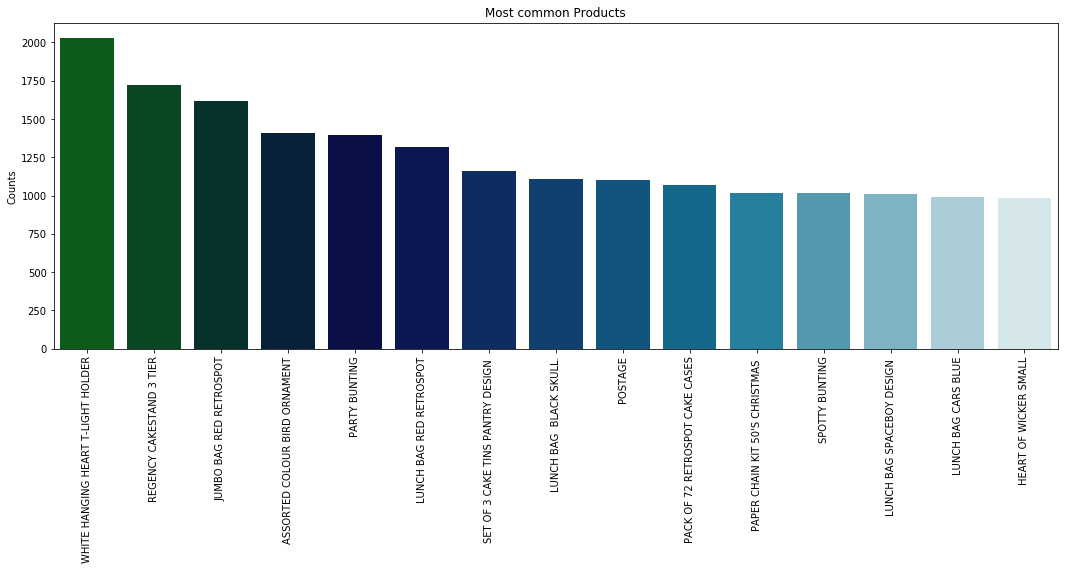

In [156]:
item_counts = retail['product_description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.color_palette("ocean", 15))
plt.ylabel("Counts")
plt.title("Most common Products");
plt.xticks(rotation=90);

In [157]:
retail['product_description'].value_counts().tail()

DROP DIAMANTE EARRINGS GREEN         1
16 PC CUTLERY SET PANTRY DESIGN      1
FLAG OF ST GEORGE CAR FLAG           1
BLACK FINE BEAD NECKLACE W TASSEL    1
PINK FLOCK PHOTO FRAME               1
Name: product_description, dtype: int64

In [158]:
def count_lower_chars(l):
    return sum(1 for c in l if c.islower())

In [159]:
retail["DescriptionLength"] = retail.product_description.apply(lambda l: len(l))
retail["LowCharsInDescription"] = retail.product_description.apply(lambda l: count_lower_chars(l))

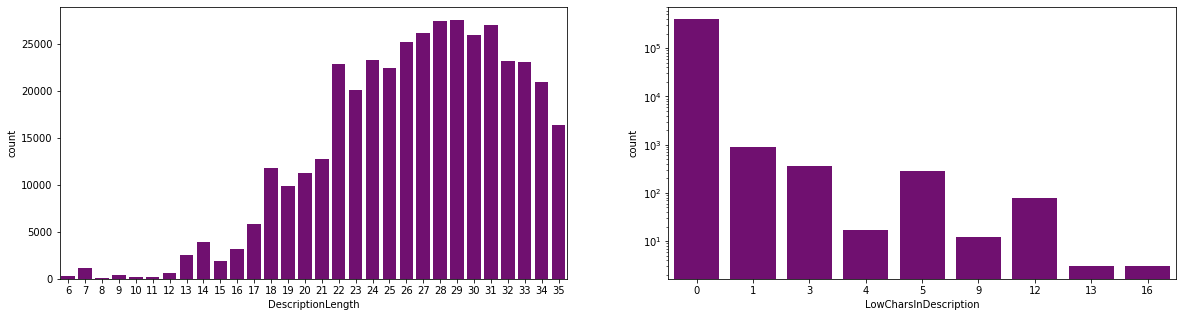

In [160]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(retail.DescriptionLength, ax=ax[0], color="Purple")
sns.countplot(retail.LowCharsInDescription, ax=ax[1], color="Purple")
ax[1].set_yscale("log")

In [161]:
retail.customer_id.nunique()

4339

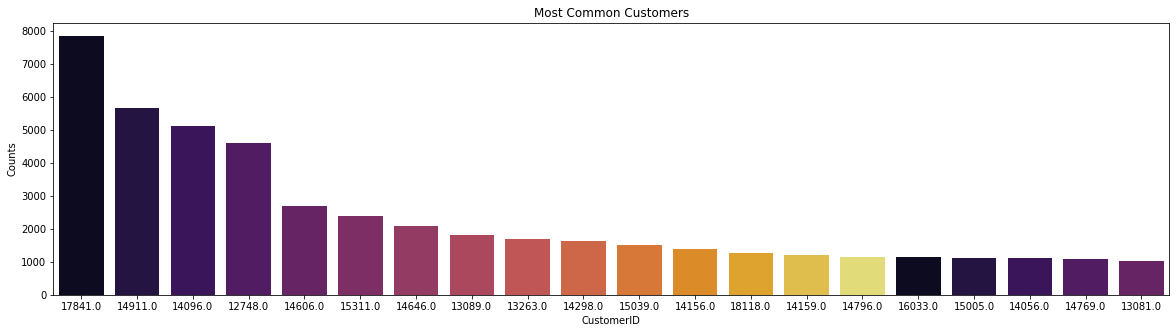

In [162]:
customer_counts = retail.customer_id.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index,palette=sns.color_palette("inferno", 15))
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Most Common Customers");

In [163]:
retail["transaction_country"].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [164]:
retail.transaction_country.nunique()

37

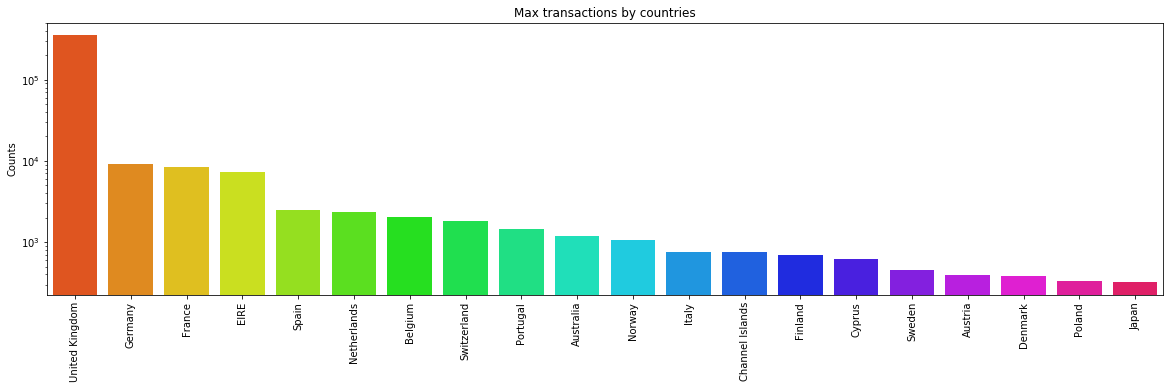

In [165]:
country_counts = retail.transaction_country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="hsv")
plt.ylabel("Counts")
plt.title("Max transactions by countries");
plt.xticks(rotation=90);
plt.yscale("log")

In [166]:
retail.loc[retail.transaction_country=="United Kingdom"].shape[0] / retail.shape[0] * 100
# percentage of entries are inside UK

89.04841125441038

In [167]:
retail.unit_price .describe()
#Strange, unit price has min value of 0

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

In [168]:
retail.loc[retail.unit_price == 0].sort_values(by="quantity_sold", ascending=False).head()
# Drop these values

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,DescriptionLength,LowCharsInDescription
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,30,0
298054,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE,26,0
436428,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,2011-11-03 11:26:00,0.0,12415.0,Australia,29,0
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.0,14646.0,Netherlands,35,0
314747,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands,24,0


In [169]:
retail = retail.loc[retail.unit_price > 0].copy()

In [170]:
retail.unit_price.describe()

count    397884.000000
mean          3.116488
std          22.097877
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

In [171]:
#Most products sold are between quantities 1 and 12
retail.quantity_sold.describe()

count    397884.000000
mean         12.988238
std         179.331775
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: quantity_sold, dtype: float64

In [178]:
retail["Revenue"] =retail.quantity_sold * retail.unit_price

retail["Year"] = retail.transaction_timestamp.dt.year
retail["Quarter"] = retail.transaction_timestamp.dt.quarter
retail["Month"] = retail.transaction_timestamp.dt.month
retail["Week"] = retail.transaction_timestamp.dt.week
retail["Weekday"] = retail.transaction_timestamp.dt.weekday
retail["Day"] = retail.transaction_timestamp.dt.day
retail["Dayofyear"] = retail.transaction_timestamp.dt.dayofyear
retail["Date"] = pd.to_datetime(retail[['Year', 'Month', 'Day']])

In [179]:
retail.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,DescriptionLength,LowCharsInDescription,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,34,0,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,19,0,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,30,0,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35,0,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,30,0,20.34,2010,4,12,48,2,1,335,2010-12-01


In [180]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "product_id"]

In [181]:
daily_data = pd.DataFrame(retail.groupby(grouped_features).quantity_sold.sum(),
                          columns=["quantity_sold"])
daily_data["Revenue"] = retail.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,product_id,quantity_sold,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00


In [182]:
daily_data.loc[:, ["quantity_sold", "Revenue"]].describe()

,quantity_sold,Revenue
count,222370.00000,222370.000000
mean,23.23970,40.074686
std,241.60083,418.479825
min,1.00000,0.001000
25%,3.00000,6.800000
50%,9.00000,15.800000
75%,24.00000,34.000000
max,80995.00000,168469.600000


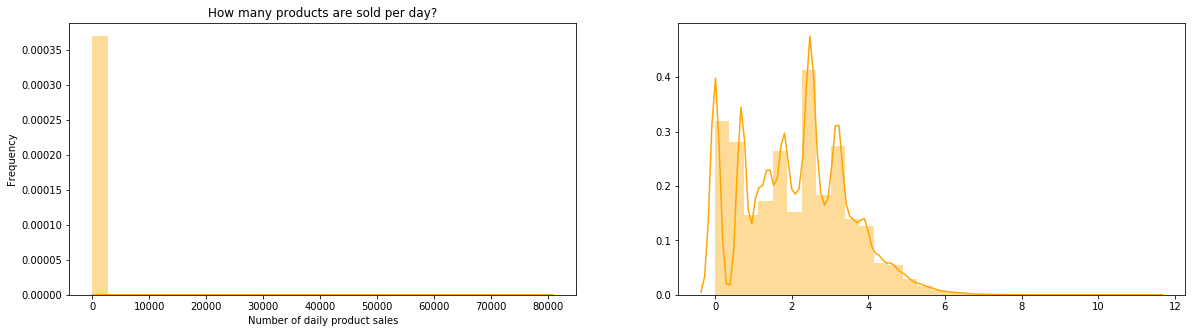

In [183]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.quantity_sold.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(daily_data.quantity_sold.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");

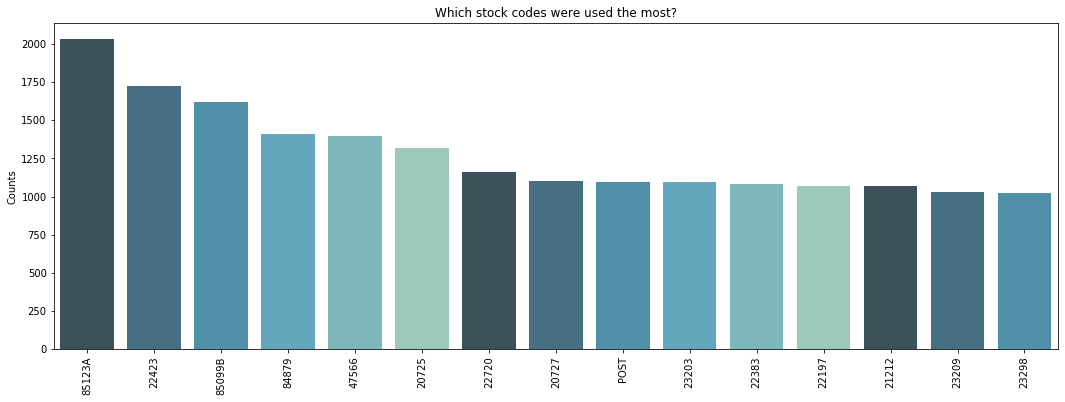

In [184]:
stock_counts = retail['product_id'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

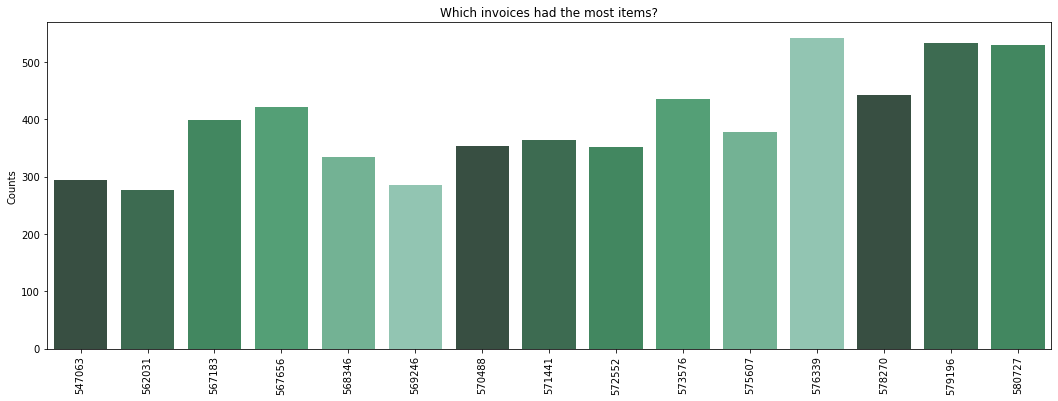

In [185]:
inv_counts = retail['transaction_id'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [186]:
retail = retail.set_index('transaction_timestamp')

In [187]:
#Outliers 

C:\Users\rishi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


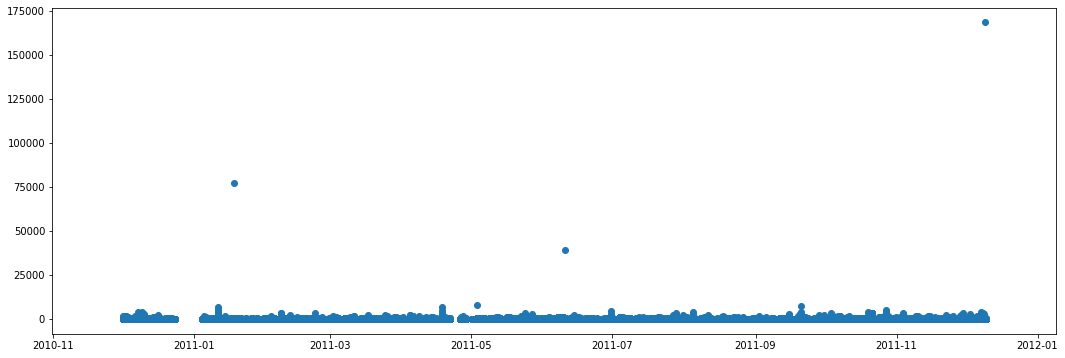

In [188]:
plt.figure(figsize=(18,6))
plt.scatter(x=retail.index, y=retail['Revenue'])

In [189]:
# Removing the outliers from revenue

(array([734077., 734138., 734197., 734258., 734319., 734381., 734442.,
        734503.]), <a list of 8 Text xticklabel objects>)

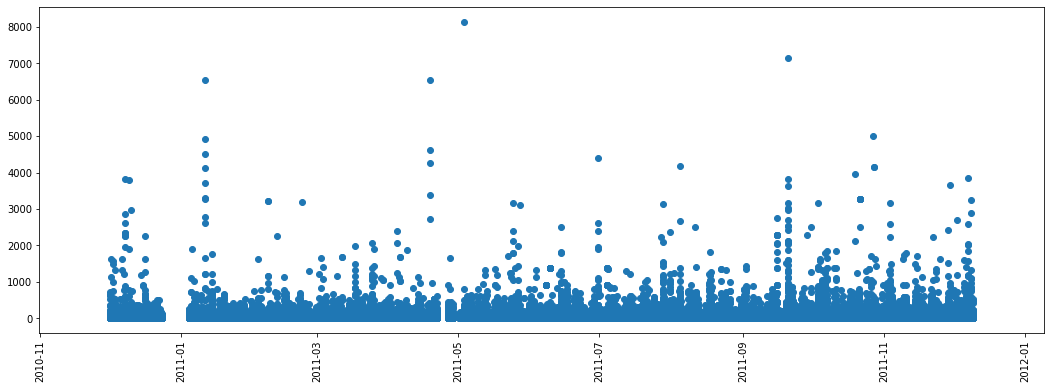

In [190]:
retail = retail[retail['Revenue'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=retail.index, y=retail['Revenue'])
plt.xticks(rotation=90)

In [191]:
retail_ts = retail[['Revenue']]
retail_ts.head()

,Revenue
transaction_timestamp,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


<Figure size 1296x432 with 0 Axes>

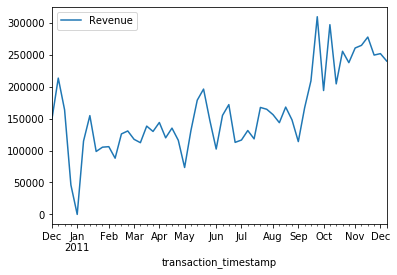

In [192]:
plt.figure(figsize=(18,6))
retail_resample = retail_ts.resample('W').sum()
retail_resample.plot()

In [193]:
retail_resample['12-2010':'01-2011']
# During new years holiday the store was closed so not processed any products

,Revenue
transaction_timestamp,
2010-12-05,149386.33
2010-12-12,213447.72
2010-12-19,163770.73
2010-12-26,46109.11
2011-01-02,0.00
2011-01-09,114865.27
2011-01-16,154714.94
2011-01-23,98574.38
2011-01-30,105288.77


In [56]:
retail.insert(loc=2, column='year_month', value=retail['transaction_timestamp'].map(lambda x: 100*x.year + x.month))

KeyError: 'transaction_timestamp'

In [194]:
orders = retail.groupby(by=['customer_id','transaction_country'], as_index=False)['transaction_id'].count()


In [195]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='transaction_id', ascending=False).head()

The TOP 5 customers with most number of orders...


,customer_id,transaction_country,transaction_id
4017,17841.0,United Kingdom,7847
1886,14911.0,EIRE,5675
1296,14096.0,United Kingdom,5111
333,12748.0,United Kingdom,4595
1668,14606.0,United Kingdom,2700


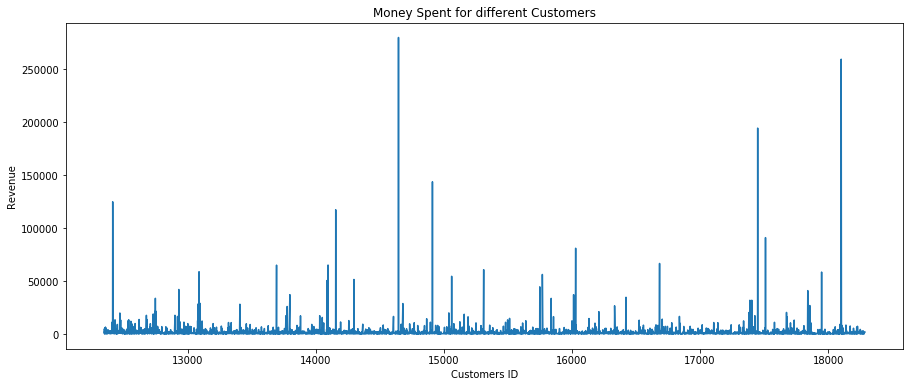

In [196]:
money_spent = retail.groupby(by=['customer_id','transaction_country'], as_index=False)['Revenue'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.Revenue)
plt.xlabel('Customers ID')
plt.ylabel('Revenue')
plt.title('Money Spent for different Customers')
plt.show()

In [65]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='Revenue', ascending=False).head()

The TOP 5 customers with highest money spent...


,customer_id,transaction_country,Revenue
1696,14646.0,Netherlands,280206.02
4208,18102.0,United Kingdom,259657.30
3735,17450.0,United Kingdom,194550.79
1886,14911.0,EIRE,143825.06
56,12415.0,Australia,124914.53


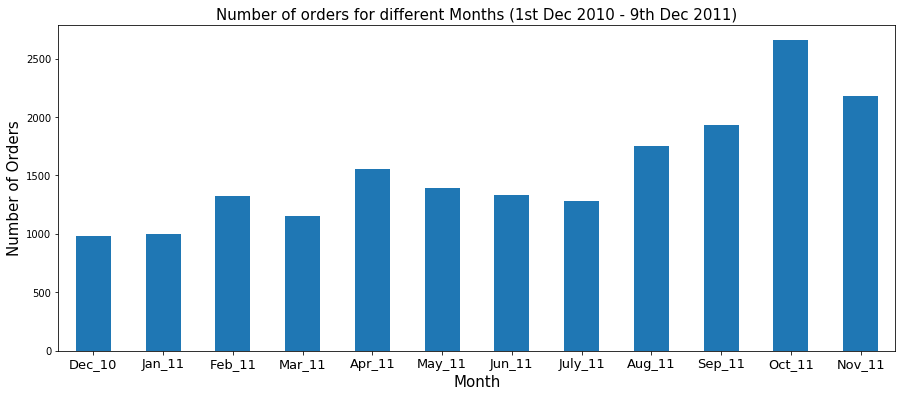

In [69]:
ax = retail.groupby('transaction_id')['Month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [117]:
plt.figure(figsize=(20,5))
plt.plot(daily_data.groupby("Date").quantity_sold.sum(), marker='+', c="yellow")

plt.xticks(rotation=90);
plt.title("Quantity sold perday");

NameError: name 'daily_data' is not defined

<Figure size 1440x360 with 0 Axes>

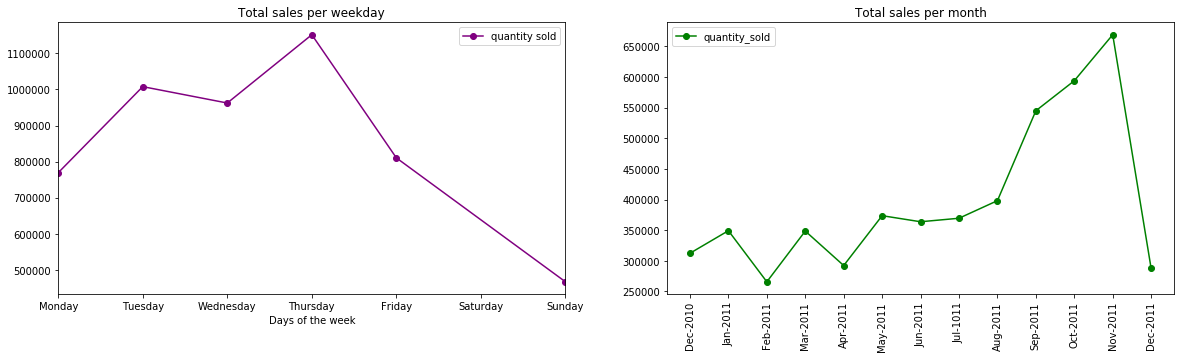

In [79]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]

daily_data.groupby("Weekday").quantity_sold.sum().plot(
    ax=ax[0], marker='o', label="quantity sold", c="purple");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7))
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("Days of the week")
ax[0].set_title("Total sales per weekday");

ax[1].plot(daily_data.groupby(["Year", "Month"]).quantity_sold.sum().values,
    marker='o', label="quantity_sold", c="green");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total sales per month");

Both visualisations yield further interesting insights:

Thursday seems to be the day on which most products are sold.
In contrast friday, and sunday have very low transactions
On saturday there are no transactions at all
The pre-Christmas season starts in september and shows a peak in november
Indeed february and april are month with very low sales.

In [80]:
df_uk = retail[retail['transaction_country'] == 'United Kingdom']
df_abroad = retail[retail['transaction_country'] != 'United Kingdom']

In [81]:
df_uk.head()

,transaction_id,product_id,product_description,quantity_sold,unit_price,customer_id,transaction_country,DescriptionLength,LowCharsInDescription,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
transaction_timestamp,,,,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,34,0,15.30,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,19,0,20.34,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,30,0,22.00,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,35,0,20.34,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,30,0,20.34,2010,4,12,48,2,1,335,2010-12-01


<ol>
No Transaction on Saturday
November 2011 is the Highest Sales
December 2011 look suspicious, Usualy the highest sales accure in December (Dataset only until 2011-12-09)
Day 1 to 8 is the busiest day, after that sale start to decline
Sales tend to increase from Monday to Thuesday, and decrease
Majority of sale accure at 10:00 to 15:00, peak at 12:00
</ol>

RFM ANALYSIS

Find recency, monetary, frequency


In [197]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
#
from sklearn.cluster import KMeans

In [198]:
data=pd.read_csv('sales_data.xlsx - Online Retail.csv')

In [199]:
data['Revenue'] = data['unit_price'] * data['quantity_sold']
data.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [200]:
data_country = data.groupby("transaction_country").agg({'Revenue': lambda x: x.sum()})

In [201]:
data_country.drop(["RSA","Unspecified","EIRE","European Community","Channel Islands"],axis=0,inplace=True)
data_country.head()

,Revenue
transaction_country,
Australia,137077.27
Austria,10154.32
Bahrain,548.40
Belgium,40910.96
Brazil,1143.60


In [202]:
# Change Data Type:
data['transaction_timestamp'] = pd.to_datetime(data['transaction_timestamp'])

# Adjust today:
today = dt.datetime(2012,1,1)
print(today)

# Bigger than zero and just UK
data = data[data['quantity_sold'] > 0]
data = data[data['Revenue'] > 0]
data = data[data["transaction_country"] == "United Kingdom"]
data.shape

2012-01-01 00:00:00


(485123, 9)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 541893
Data columns (total 9 columns):
transaction_id           485123 non-null object
product_id               485123 non-null object
product_description      485123 non-null object
quantity_sold            485123 non-null int64
transaction_timestamp    485123 non-null datetime64[ns]
unit_price               485123 non-null float64
customer_id              354321 non-null float64
transaction_country      485123 non-null object
Revenue                  485123 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.0+ MB


In [204]:
data_x = data.groupby('customer_id').agg({'Revenue': lambda x: x.sum(),
                                        'transaction_timestamp': lambda x: (today - x.max()).days})
data_x.head()

,Revenue,transaction_timestamp
customer_id,,
12346.0,77183.60,347
12747.0,4196.01,24
12748.0,33719.73,22
12749.0,4090.88,25
12820.0,942.34,25


In [205]:
# Dataset is basis on StockCode    
data_y = data.groupby(['customer_id','transaction_id']).agg({'Revenue': lambda x: x.sum()})
data_y.head(20)


Revenue
customer_id transaction_id          
12346.0     541431          77183.60
12747.0     537215            358.56
            538537            347.71
            541677            303.04
            545321            310.78
            551992            442.96
            554549            328.35
            558265            376.30
            563949            301.70
            569397            675.38
            577104            312.73
            581163            438.50
12748.0     536521              4.95
            536641              4.25
            537136            273.76
            537140             70.42
            537142             41.45
            537155             75.64
            537213              8.65
            537225            496.48

In [206]:
# Find Frequency
data_z = data_y.groupby('customer_id').agg({'Revenue': lambda x: len(x)})
data_z.head()

,Revenue
customer_id,
12346.0,1.0
12747.0,11.0
12748.0,209.0
12749.0,5.0
12820.0,4.0


In [207]:
# RFM Dataframe
rfm_table= pd.merge(data_x,data_z, on='customer_id')

# Change Column Name
rfm_table.rename(columns= {'transaction_timestamp': 'Recency',
                          'Revenue_y': 'Frequency',
                          'Revenue_x': 'Monetary'}, inplace= True)
rfm_table.head()

,Monetary,Recency,Frequency
customer_id,,,
12346.0,77183.60,347,1.0
12747.0,4196.01,24,11.0
12748.0,33719.73,22,209.0
12749.0,4090.88,25,5.0
12820.0,942.34,25,4.0


RFM Segmentation
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [208]:
rfm_table.shape

(3920, 3)

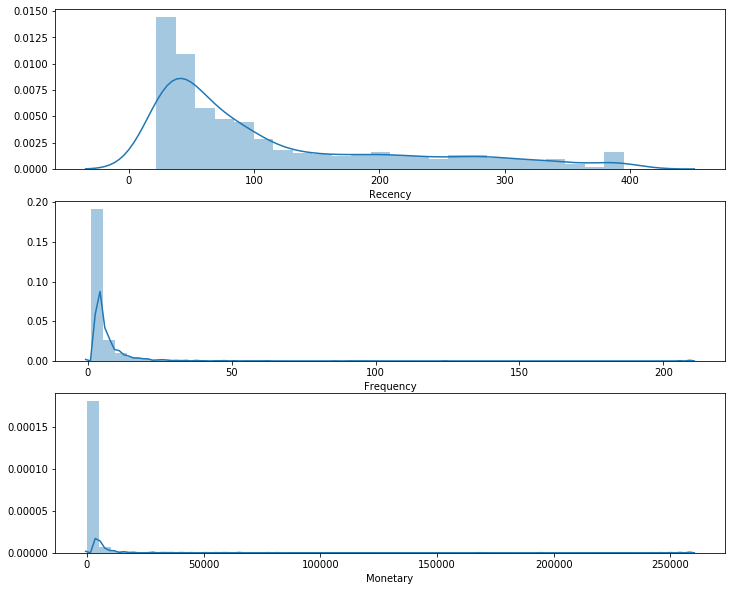

In [209]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_table['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_table['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_table['Monetary'])
# Show the plot
plt.show()

In [210]:
def FScore(x,p,d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]: 
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4

quantiles = rfm_table.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['F_score'] = rfm_table['Frequency'].apply(FScore, args=('Frequency',quantiles,))

#Recency 
rfm_table = rfm_table.sort_values('Recency',ascending=True)
rfm_table['R_score'] = pd.qcut(rfm_table['Recency'],5,labels=False)

#Monetary 
rfm_table['M_score'] = pd.qcut(rfm_table['Monetary'],5,labels=False)
# instead of zero, plus 1 
rfm_table['R_score'] = rfm_table['R_score'] + 1
rfm_table['F_score'] = rfm_table['F_score'] + 1
rfm_table['M_score'] = rfm_table['M_score'] + 1

# Add to dataframe
rfm_table['RFM Score'] = rfm_table['R_score'].map(str) + rfm_table['F_score'].map(str) + rfm_table['M_score'].map(str)
rfm_table.head()

,Monetary,Recency,Frequency,F_score,R_score,M_score,RFM Score
customer_id,,,,,,,
16446.0,168472.50,22,2.0,2,1,5,125
17389.0,31833.68,22,34.0,5,1,5,155
13069.0,4436.12,22,24.0,5,1,5,155
16954.0,2085.08,22,9.0,5,1,5,155
16558.0,8338.49,22,20.0,5,1,5,155


In [211]:
# BEST CUSTOMERS
rfm_table[rfm_table['RFM Score'] == '555'].sort_values('Monetary', ascending=False).head()

,Monetary,Recency,Frequency,F_score,R_score,M_score,RFM Score
customer_id,,,,,,,
13093.0,7832.47,297,8.0,5,5,5,555
17850.0,5391.21,394,34.0,5,5,5,555
17230.0,3638.41,286,8.0,5,5,5,555
17504.0,2997.03,228,9.0,5,5,5,555
15235.0,2247.51,239,12.0,5,5,5,555


In [212]:
#lost customers
#Customers who's recency, frequency as well as monetary values are low 
rfm_table[rfm_table['RFM Score'] == '111'].sort_values('Recency',ascending=False).head()

,Monetary,Recency,Frequency,F_score,R_score,M_score,RFM Score
customer_id,,,,,,,
17885.0,190.19,34,1.0,1,1,1,111
15540.0,213.30,33,1.0,1,1,1,111
17359.0,127.86,33,1.0,1,1,1,111
13188.0,114.60,33,1.0,1,1,1,111
13428.0,218.47,32,1.0,1,1,1,111


In [213]:
#Loyal customers
#Customers with high frequency value

rfm_table[rfm_table['F_score'] >= 3 ].sort_values('Monetary', ascending=False).head()


,Monetary,Recency,Frequency,F_score,R_score,M_score,RFM Score
customer_id,,,,,,,
18102.0,259657.30,22,60.0,5,1,5,155
17450.0,194550.79,30,46.0,5,1,5,155
17511.0,91062.38,24,31.0,5,1,5,155
16029.0,81024.84,60,63.0,5,3,5,355
16684.0,66653.56,26,28.0,5,1,5,155


In [214]:
#Summing the RFM Score

In [215]:
# Calculate RFM_Score
rfm_table['RFM_Sum'] = rfm_table[['F_score','R_score','M_score']].sum(axis=1)
rfm_table.head()

,Monetary,Recency,Frequency,F_score,R_score,M_score,RFM Score,RFM_Sum
customer_id,,,,,,,,
16446.0,168472.50,22,2.0,2,1,5,125,8
17389.0,31833.68,22,34.0,5,1,5,155,11
13069.0,4436.12,22,24.0,5,1,5,155,11
16954.0,2085.08,22,9.0,5,1,5,155,11
16558.0,8338.49,22,20.0,5,1,5,155,11


In [216]:
rfm_table['RFM_Sum'].max()

15

In [217]:
def rfm_level(df):
    if df['RFM_Sum'] >= 13:
        return 'Champions'
    elif ((df['RFM_Sum'] >= 11) and (df['RFM_Sum'] <=12)):
        return 'Loyal'
    elif ((df['R_score'] >=3) and (df['F_score'] >= 3  ) and (df['M_score'] >= 1 )):
        return 'Potential Loyalist'
    elif ((df['R_score'] >=3) and (df['F_score'] <= 2  ) and (df['M_score'] >= 4 )):
        return 'Promising'
    elif ((df['R_score'] >=3) and (df['F_score']>3  ) and (df['M_score'] >= 1 )):
        return 'Needs attention'
    elif ((df['R_score'] ==1) and ((df['F_score'] == 5) or (df['F_score'] == 1)  ) and (df['M_score'] >= 3 )):
        return 'Cant Lose but losing'
    else:
        return 'Lost'
# Create a new variable RFM_Level
rfm_table['RFM_Level'] = rfm_table.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_table.head()

,Monetary,Recency,Frequency,F_score,R_score,M_score,RFM Score,RFM_Sum,RFM_Level
customer_id,,,,,,,,,
16446.0,168472.50,22,2.0,2,1,5,125,8,Lost
17389.0,31833.68,22,34.0,5,1,5,155,11,Loyal
13069.0,4436.12,22,24.0,5,1,5,155,11,Loyal
16954.0,2085.08,22,9.0,5,1,5,155,11,Loyal
16558.0,8338.49,22,20.0,5,1,5,155,11,Loyal


In [218]:
rfm_table["RFM_Level"].value_counts()

Lost                    2488
Loyal                    885
Potential Loyalist       229
Champions                145
Promising                115
Cant Lose but losing      58
Name: RFM_Level, dtype: int64

In [219]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_table.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                     Recency Frequency Monetary      
                        mean      mean     mean count
RFM_Level                                            
Cant Lose but losing    28.0       7.3   1465.2    58
Champions              122.6       8.3   4552.0   145
Lost                   129.6       2.0    636.0  2488
Loyal                   73.2      10.4   5279.4   885
Potential Loyalist     107.1       3.3    658.5   229
Promising              127.7       1.6   1373.3   115


In [220]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [221]:
import squarify

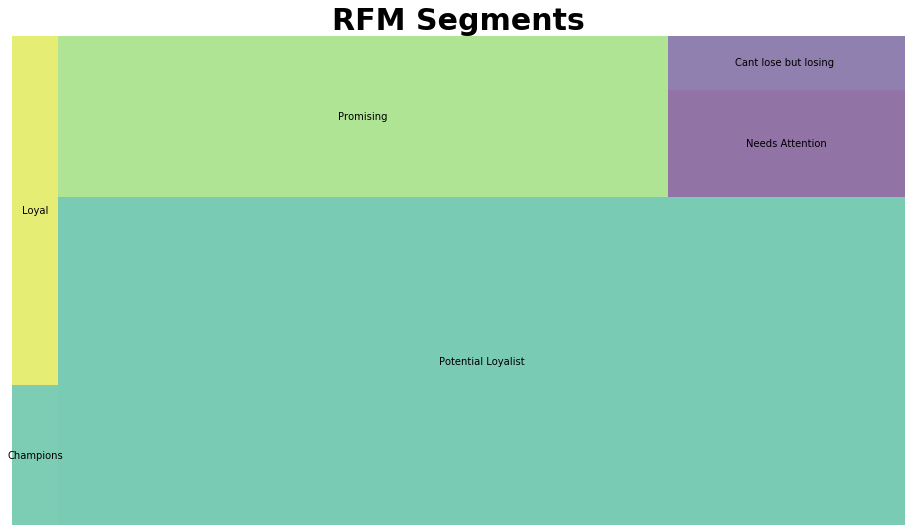

In [226]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Champions',
                     'Loyal',
                     'Potential Loyalist',
                     'Promising',
                     'Needs Attention', 
                     'Cant lose but losing ', 
                     'Lost'], alpha=.6 )
plt.title("RFM Segments",fontsize=30,fontweight="bold")
plt.axis('off')
plt.show()

In [116]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


def main():
    clean_dataset()
    df = pd.DataFrame(pd.read_csv('sales_data_pre_processed.csv'))
    sns.set()
    # plt.figure(figsize=(8, 8))
    # plt.plot(df['product_description'].value_counts().nlargest(10), marker='.')
    # plt.xlabel("Top 10 Most Common Products")
    # plt.ylabel("Items Purchased")
    # plt.ylim(0, 3000)
    # plt.xticks(rotation=90)
    # plt.show()
    #
    # plt.figure(figsize=(8, 8))
    # plt.plot(df['transaction_country'].value_counts().nlargest(10), marker='.')
    # plt.xlabel("Top 10 Countries")
    # plt.ylabel("Items Purchased")
    # plt.yscale("log")
    # plt.xticks(rotation=90)
    # plt.show()

    plt.figure(figsize=(8, 8))
    plt.plot(df['revenue'])
    plt.xlabel("Time")
    plt.ylabel("Revenue")
    plt.xticks(rotation=90)
    plt.show()


def clean_dataset():
    df = pd.DataFrame(pd.read_excel('sales_data.xlsx'))
    print(df.shape)
    df = df[df['quantity_sold'] > 0]
    df = df[df['unit_price'] > 0]
    df['revenue'] = df['unit_price'] * df['quantity_sold']
    # df['week'] = df['transaction_timestamp'].dt.week
    df['timestamp'] = pd.to_datetime(df['transaction_timestamp'])
    df = df.set_index('timestamp')
    df.to_csv('sales_data_pre_processed.csv')
    print(df.shape)


if __name__ == "__main__":
    main()


(541909, 8)


KeyError: 'quantity_sold'